In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import deconomix
import warnings

In [2]:
sc_df_train, sc_df_test = deconomix.utils.load_example()

Raw data already downloaded
Importing Data to Python ...
Using cached, preprocessed data
Done


In [3]:
_, bulk_df_test, C_test = deconomix.utils.simulate_data(sc_df_test, 1000, 100)

In [4]:
model = deconomix.models.Deconomix(verbose = True)

Simulating artificial bulks...
Artificial bulks simulated.
Optimizing gene weights via DTD algorithm...


i = 1000, loss = -5.917457e+00: 100%|██████████| 1000/1000 [00:06<00:00, 154.38it/s]


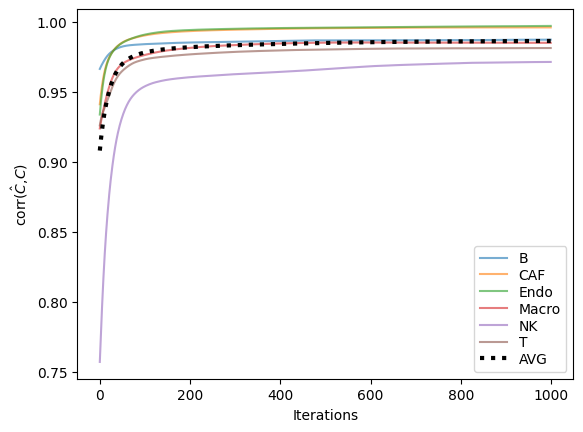

Gene weights optimized.


In [5]:
model.fit(sc_df_train)

In [11]:
model.predict(bulk_df_test, model = 'Deconomix+h,r', lambda2=1e-6)

/app/deconomix/models.py:85: UserWarning: You have already applied a model to the data. Predicting with a new model will overwrite estimates C_est, c_est, x_est and Delta_est.
  warnings.warn("You have already applied a model to the data. Predicting with a new model will overwrite estimates C_est, c_est, x_est and Delta_est.")


Applying ADTD algorithm to infer hidden background contributions and cell-type-specific gene regulation.


i = 41, err = 9.25e-09 - Convergence reached!:   4%|▍         | 41/1000 [00:32<12:50,  1.24it/s]                                                 


In [12]:
model.C_est


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Celltypes,,,,,,,,,,,,,,,,,,,,,
B,0.124322,0.102195,0.161854,0.154037,0.129866,0.110305,0.106178,0.140345,0.106202,0.209935,...,0.174446,0.168356,0.201050,0.185189,0.176789,0.155732,0.123467,0.174979,0.116221,0.067237
CAF,0.057487,0.042947,0.038066,0.019597,0.026493,0.067527,0.022568,0.009317,0.036558,0.054318,...,0.010265,0.020996,0.013628,0.002171,0.023467,0.037503,0.009900,0.015128,0.018266,0.021271
Endo,0.011846,0.039712,0.065180,0.021072,0.009029,0.047185,0.036523,0.013807,0.026791,0.030072,...,0.058609,0.031099,0.005233,0.045328,0.051123,0.051353,0.050493,0.068985,0.035685,0.055198
Macro,0.065296,0.057911,0.061988,0.089753,0.083551,0.030592,0.098467,0.072681,0.130151,0.056863,...,0.094002,0.087279,0.101761,0.098026,0.036346,0.050948,0.049831,0.071053,0.065367,0.164850
NK,0.020793,0.027266,0.000000,0.000000,0.017699,0.005933,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.019935,0.016740,0.010921,0.014143,0.002226,0.020275,0.000000,0.000000,0.000000
T,0.643963,0.643459,0.598418,0.652700,0.662589,0.655309,0.648665,0.700115,0.631398,0.570948,...,0.593936,0.625786,0.617644,0.605360,0.626495,0.618547,0.656142,0.587129,0.698609,0.617906


In [8]:
model.c_est

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
hidden,0.076294,0.08651,0.074494,0.062841,0.070773,0.08315,0.0876,0.063735,0.068899,0.077864,...,0.068742,0.046548,0.043944,0.053005,0.071637,0.083692,0.089891,0.082725,0.065852,0.073538


In [9]:
model.x_est

,0
Genes,
HLA-DRA,5.796367e-05
TYROBP,7.345285e-04
NKG7,3.498694e-03
IGFBP7,2.129609e-03
FCER1G,3.502509e-04
...,...
IMPDH2,6.651971e-04
SAR1A,4.684714e-08
RBMS3,5.484765e-04


In [10]:
model.Delta_est

Celltypes,B,CAF,Endo,Macro,NK,T
Genes,,,,,,
HLA-DRA,0.980451,1.000678,1.011183,0.979625,1.006123,0.984385
TYROBP,1.001162,1.000000,1.001527,0.956704,0.924736,0.980602
NKG7,1.000369,1.000000,1.001140,1.000000,1.052600,1.074104
IGFBP7,1.000000,1.010466,1.024985,1.001485,1.004218,1.000383
FCER1G,1.000000,1.000000,1.003985,0.921171,0.906416,0.955181
...,...,...,...,...,...,...
IMPDH2,1.004223,1.011993,1.009989,1.003619,1.003135,1.011757
SAR1A,0.934667,1.000148,1.000724,0.991073,1.011912,0.778874
RBMS3,1.027101,1.368380,0.890389,1.000134,1.000000,1.089413
